This is a data-driven study project of the meterological data over the past years to show the effect of global warming. 
First we import all the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import os
for dirname,_,filenames in os.walk('kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we import the data for the analysis.

In [ ]:
data = pd.read_csv('/content/sample_data/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


After we have had a look at the data, we need to check for all null values in the database.

In [ ]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Looking at the data, we see that we have 517 unspecified values for the precip type but since that data is irrelevant to us for analysis, we will drop the column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Now we choose the necessary columns for our analysis.

In [ ]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
col=['Formatted Date','Apparent Temperature (C)','Humidity','Daily Summary']
data=data[col]
data.head()

,Formatted Date,Apparent Temperature (C),Humidity,Daily Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Partly cloudy throughout the day.


For analysing data further, it is necessary to change the 'Formatted Date' into Date-Time format because the data type of this feature is 'object' and we can't train our model on object data type. It can simply be done by using pandas predefined function -> pd.to_datetime().

In [ ]:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'],utc=True)
data=data.set_index('Formatted Date')
data=data.resample('M').mean()
data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


It's time to visualize our data using some outstanding libraries called matplotlib and seaborn.
Firstly, let's have a look at variation of 'Apparent Temprature' and 'Humidity' with time

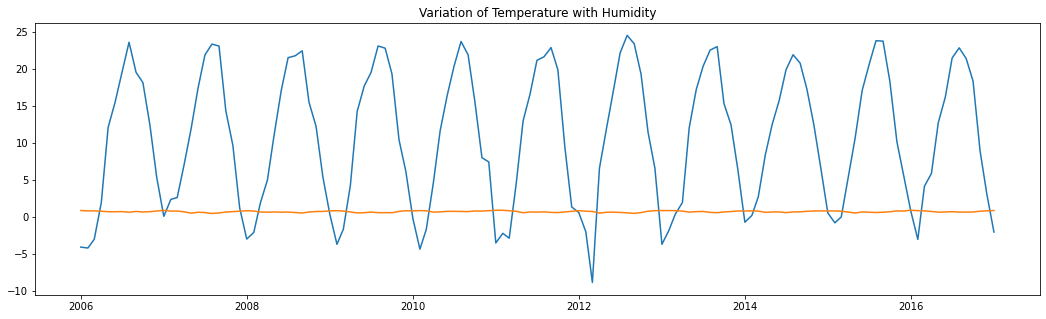

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Variation of Temperature with Humidity')
plt.plot(data)

Now, let's plot the graph of temperature with humidity for every even month.


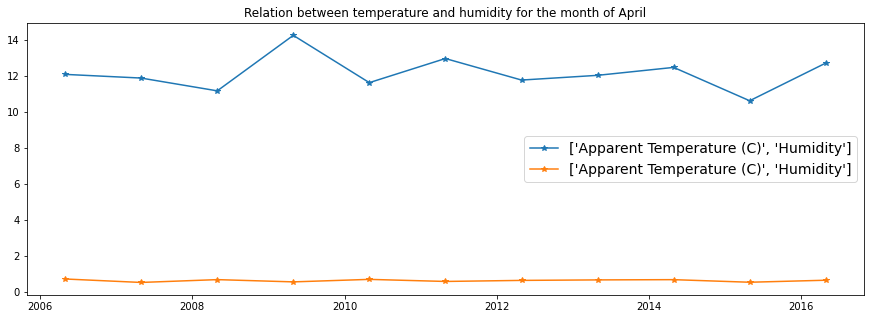

In [ ]:
plt.figure(figsize=(15,5))
data_of_April=data[data.index.month==4]
plt.plot(data_of_April,marker='*',label=['Apparent Temperature (C)','Humidity'])
plt.legend(loc = 'center right',fontsize = 14)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

From the above graph it is clear that for the year 2009, there is sudden increase in temperature and it is the maximum temperature of April. The temperature again fall after 2009 and in 2015 april reached it's minimum temperature.
Now, let's plot the co-relation between the features our our data. And let's see what we can find out from that.
For this case Heatmap will be of great help from seaborn library.


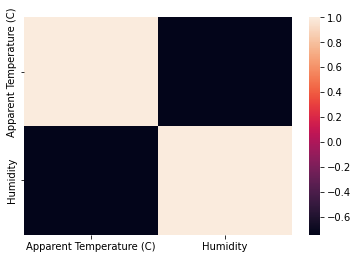

In [ ]:
correlation = data.corr()
sns.heatmap(correlation)

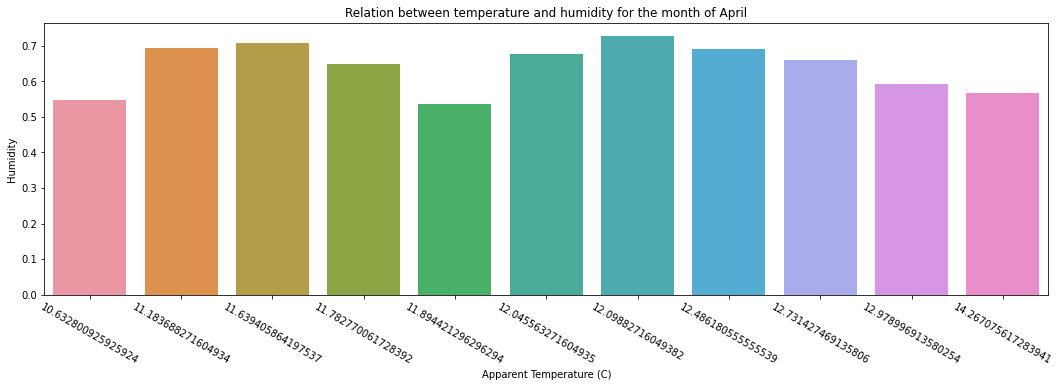

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=data_of_April)
plt.xticks(rotation=-30)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

**Conclusion
-
Our environment is highly affected by Global Warming. From our analysis it's been a clear observation that their is sudden increase in temperature and sudden decrease in temperature over ten years. But, in case of humidity, it is seen that it neither rise of fall instead stayed same over 10 years**